The purpose of this notebook is to analyze video game sales.

In [125]:
import pandas as pd 
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
rawDF = pd.read_csv("vgsales.csv")

In [3]:
rawDF.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
rawDF.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [25]:
cleanedDF = rawDF.dropna()

In [26]:
cleanedDF.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
genreGroup = rawDF.groupby("Genre").size()

In [114]:
genreGroup.index


Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

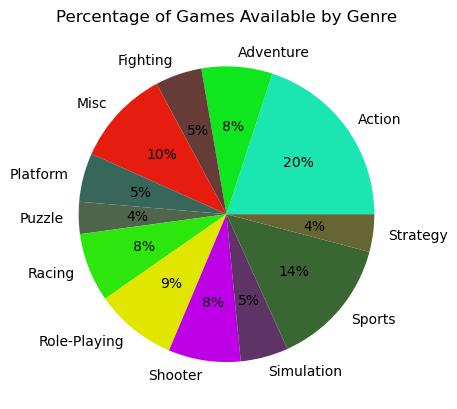

In [116]:
plt.pie(genreGroup, labels= genreGroup.index, autopct= "%1.0f%%",
        colors=["#1BE6B2", "#0EE61D", "#663C39", "#E61C0E", "#39665B",
                "#50664C", "#2DE60E", "#E1E600", "#BE00E6", "#5E3366",
                "#3A6633", "#656633"])
plt.title("Percentage of Games Available by Genre")

plt.show()

In [134]:
percentGame = rawDF["Platform"].value_counts().head(12)

In [141]:
percentGame.index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS'],
      dtype='object', name='Platform')

Text(0, 0.5, '')

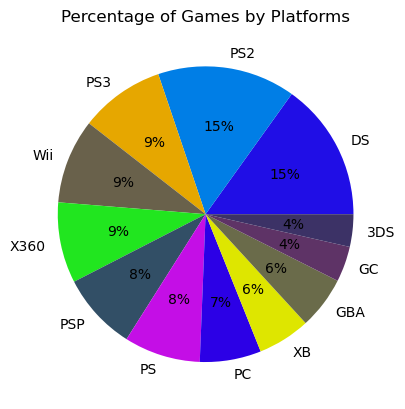

In [142]:
##rawDF["Platform"].value_counts().head(15).plot(kind="pie", autopct = "%1.0f%%")
plt.pie(percentGame, labels=percentGame.index,
        autopct= "%1.0f%%",
        colors=['#200EE6','#007EE6','#E6A700',"#69614B", "#21E61F", "#324F66",
                "#C40EE6", "#2C00E6", "#DEE600", "#6A6B4A", "#5E3366", "#3C3266"])
plt.title("Percentage of Games by Platforms")
plt.xlabel("")
plt.ylabel("")


In [119]:
topGamePsDF = cleanedDF["Publisher"].value_counts().head(20)

Text(0.5, 1.0, 'Top 20 Game Publishers')

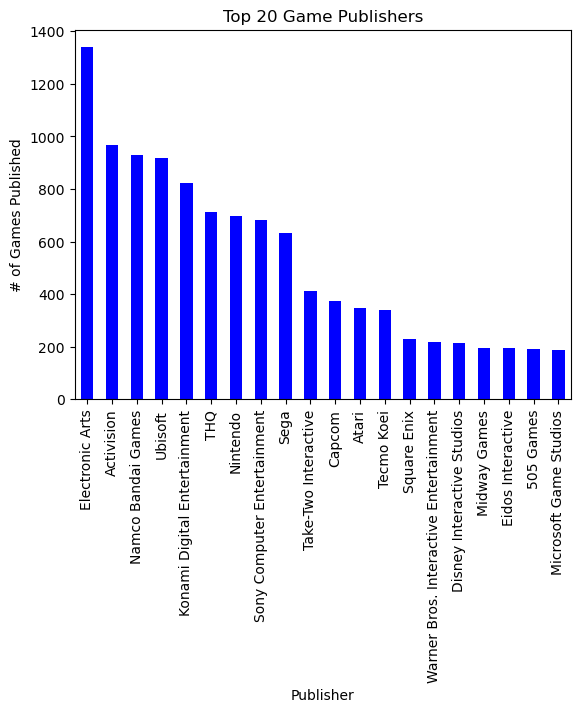

In [139]:
topGamePsDF.plot(kind="bar", color="blue")
plt.ylabel("# of Games Published")
plt.title("Top 20 Game Publishers")

In [97]:
highestSellPDF = cleanedDF.groupby("Publisher")["Global_Sales"].sum().sort_values(
    ascending=False
).head(20)
highestSellPDF.reset_index()

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


Text(0.5, 1.0, 'Highest Global Sales by Publisher')

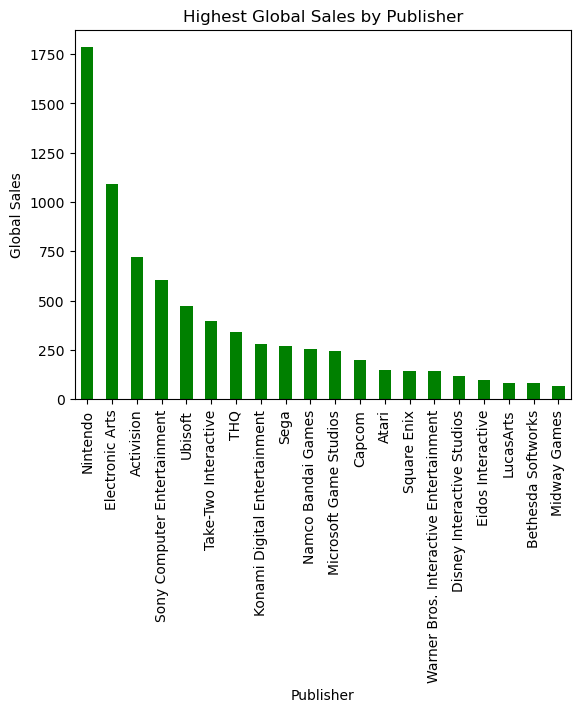

In [138]:
highestSellPDF.plot(kind="bar", color="green")
plt.ylabel("Global Sales")
plt.title("Highest Global Sales by Publisher")

In [110]:
highestSellGDF = cleanedDF.groupby("Genre")["Global_Sales"].sum().sort_values(
    ascending=False
)
highestSellGDF.reset_index()

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


In [ ]:
["#1BE6B2", "#0EE61D", "#663C39", "#E61C0E", "#39665B",
                "#50664C", "#2DE60E", "#E1E600", "#BE00E6", "#5E3366",
                "#3A6633", "#656633"]

In [154]:
my_colors = list(islice(cycle(['#1BE6B2', '#3A6633', '#BE00E6', '#E1E600', '#39665B', "#E61C0E",
                               "#2DE60E", "#663C39", "#5E3366", "#50664C",
                                "#0EE61D", "#656633" ]), None, 12))

Text(0.5, 1.0, 'Highest Global Sales by Genre')

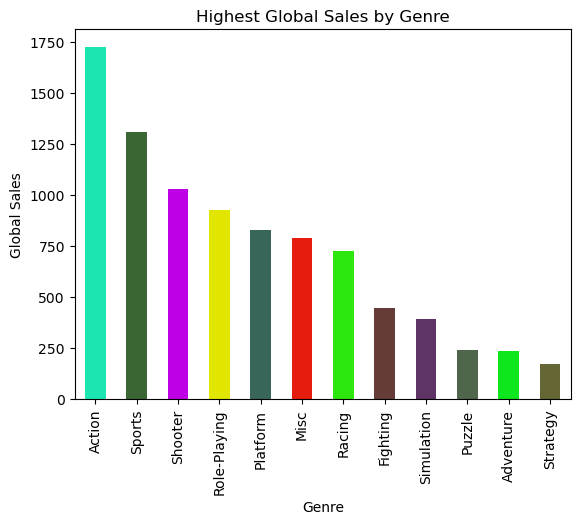

In [155]:
highestSellGDF.plot(kind="bar", color = my_colors)
plt.ylabel("Global Sales")
plt.title("Highest Global Sales by Genre")

In [151]:
genreGroup.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [136]:
highestSellPlatDF = cleanedDF.groupby("Platform")["Global_Sales"].sum().sort_values(
    ascending=False
).head(12)
highestSellPlatDF.reset_index()

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.10
9,PC,254.70


In [147]:
my_colors = list(islice(cycle(['#007EE6','#21E61F','#E6A700',"#69614B", "#200EE6",
                                "#C40EE6","#6A6B4A", "#324F66", "#3C3266",
                                  "#2C00E6", "#5E3366", "#DEE600"]), None, 12))

Text(0.5, 1.0, 'Highest Global Sales by Platform')

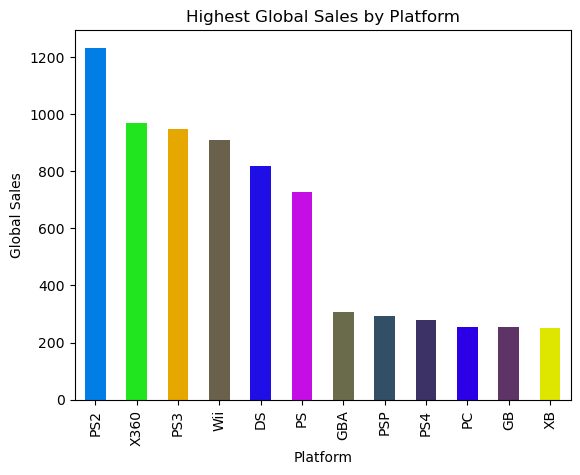

In [148]:
highestSellPlatDF.plot(kind="bar", color = my_colors)
plt.ylabel("Global Sales")
plt.title("Highest Global Sales by Platform")

I retrieved the data set from this kaggle page as well as used some of his methods to create the data seen above

https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization